In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [18]:
house= pd.read_csv('../../../data/kc_house_data.csv')
#reading the data file into the learn-env

In [19]:
house.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

C:\Users\kamry\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


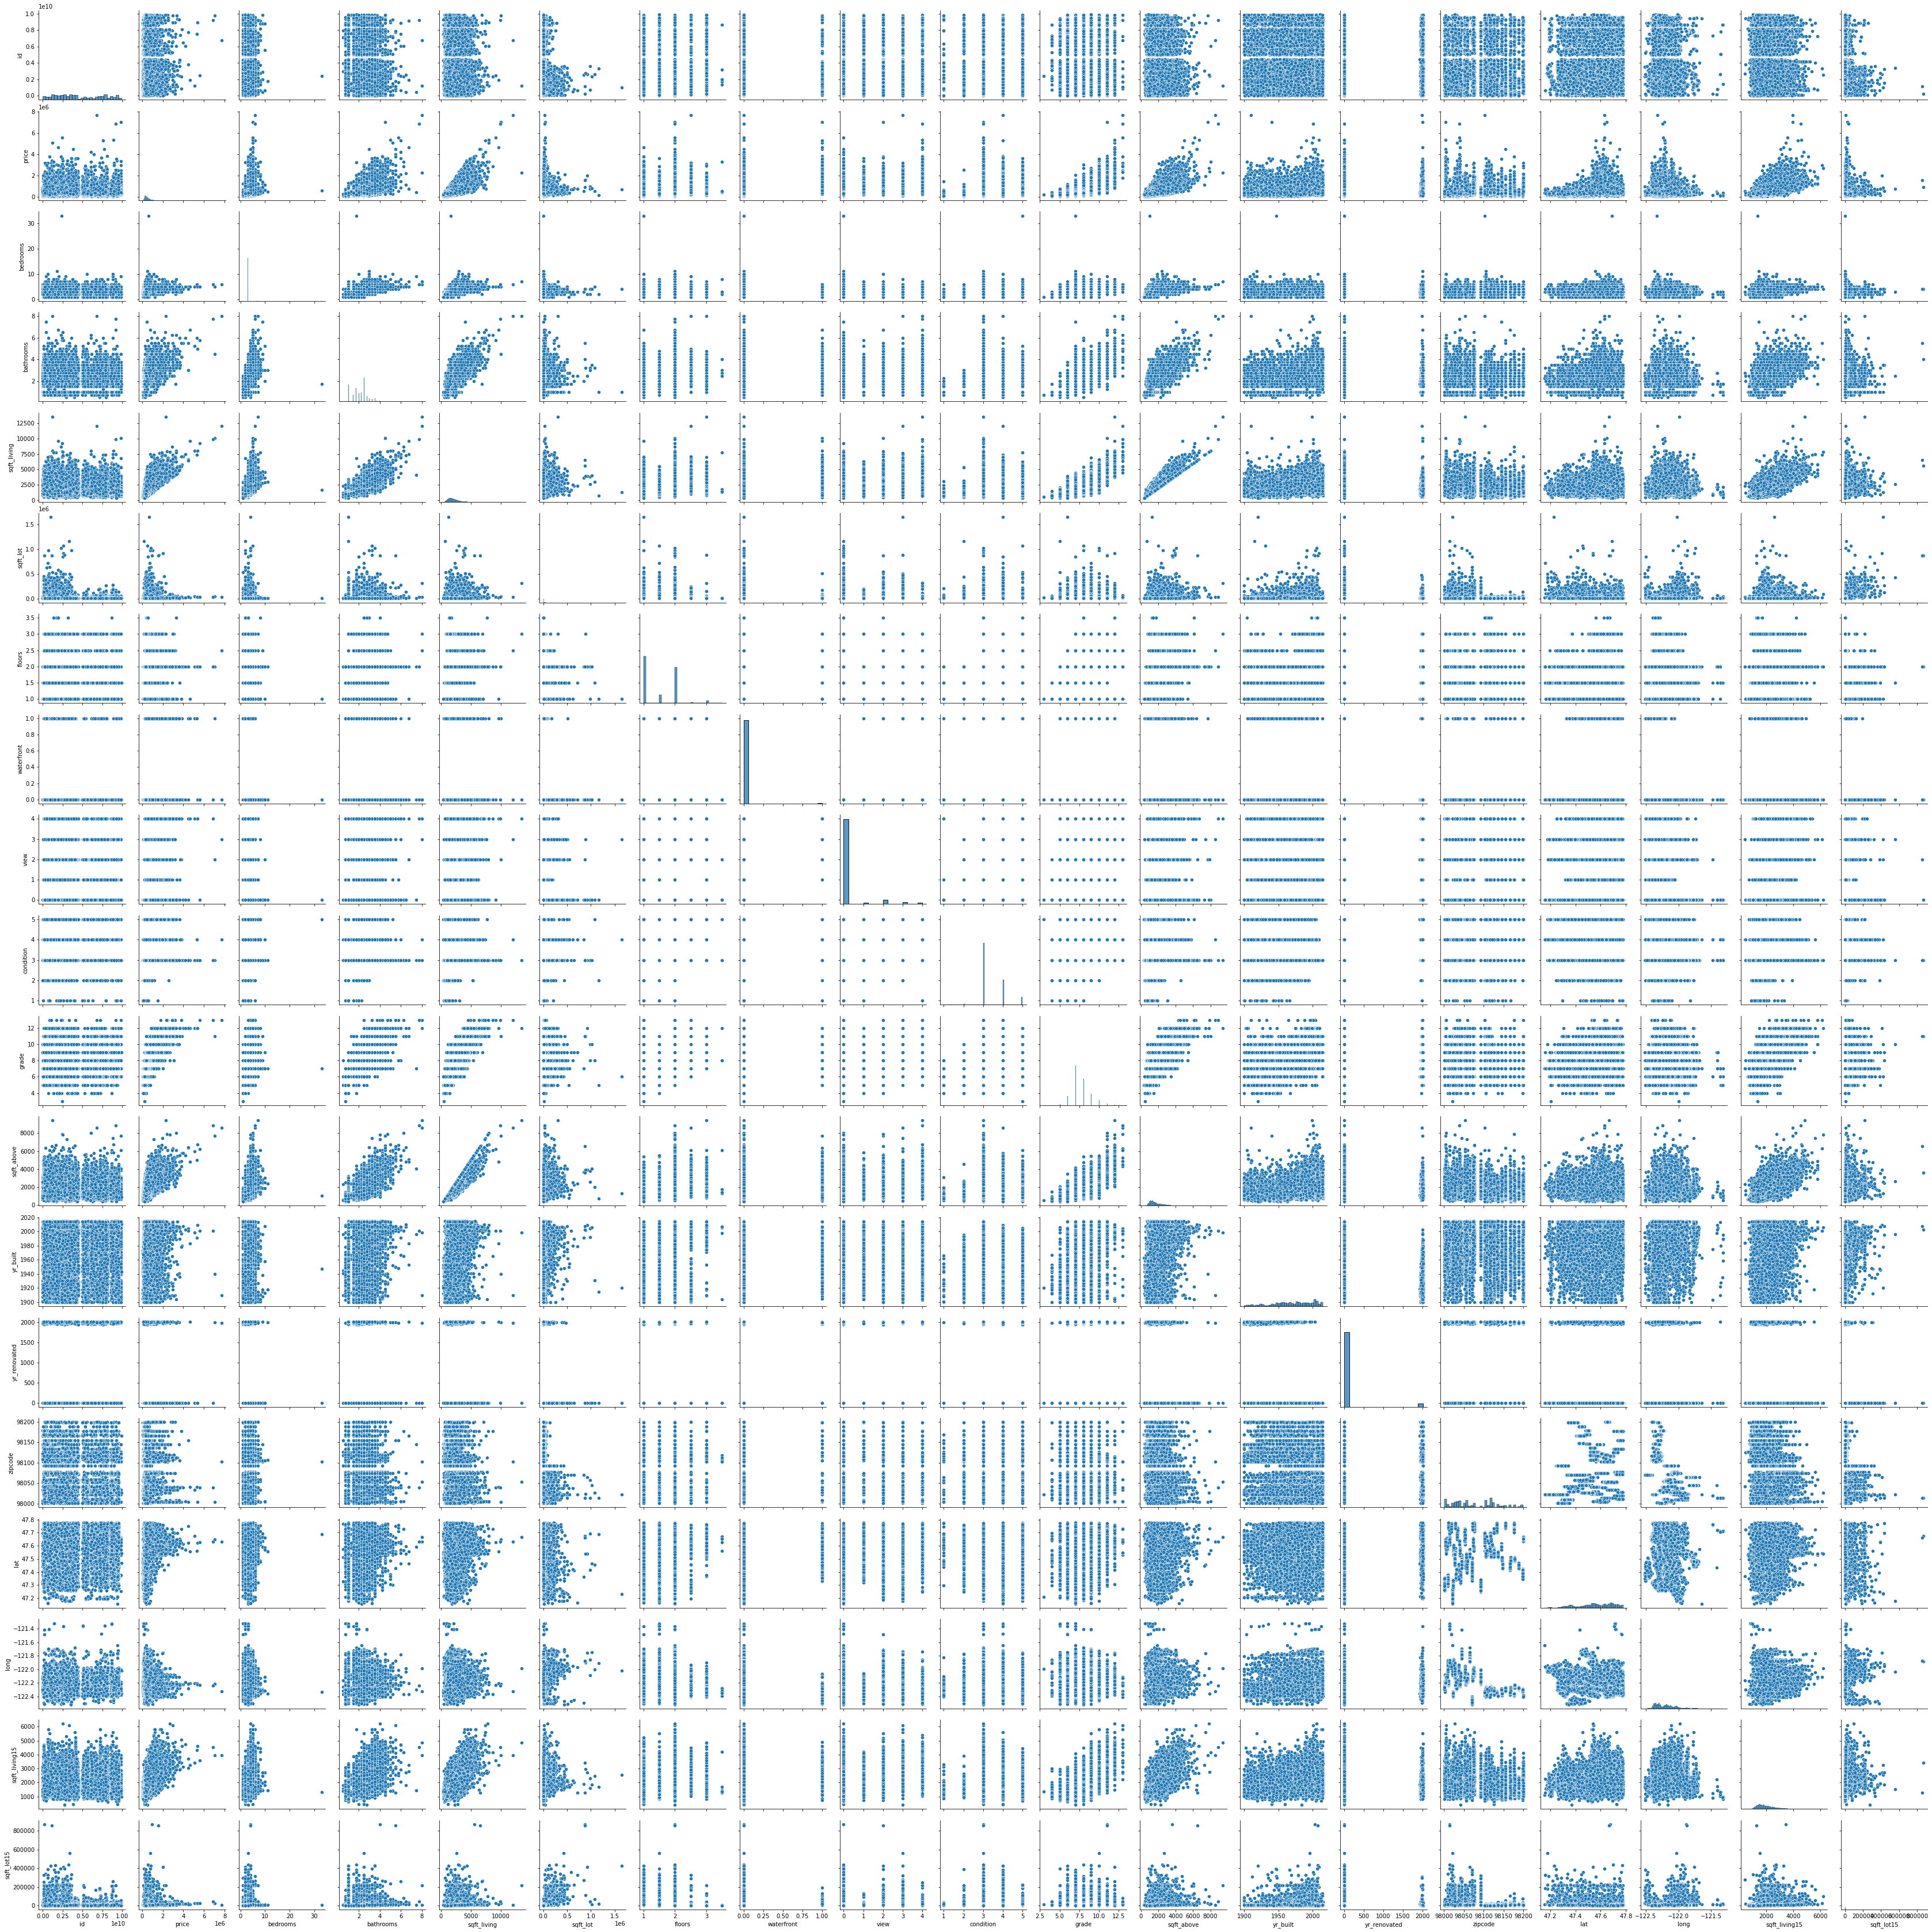

In [5]:
sns.pairplot(house, size=2.5)


In [20]:
house.columns.to_list()
#printing columns into a list for easier readability 

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [21]:
house.isna().sum()
#getting the amount of null values in each column so that we can see what we are working with in terms of whether or not
#we want to drop or impute

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [84]:
house.dtypes
#seeing what types of data we are working with

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
basement            bool
dtype: object

In [25]:
house["sqft_basement"] = pd.to_numeric(house.sqft_basement, errors='coerce')

In [57]:
house["sqft_basement"] = house.sqft_basement.astype(float)

In [33]:
def f(column):
    if column['sqft_basement'] == [0]:
        val = 0
    else:
        column['sqft_basement'] >= [1]
        val = 1
   
    return val

In [34]:
f(has_basement)

TypeError: 'function' object is not subscriptable

In [58]:
def has_basement(sqft_basement, basement_float):
    if basement_float in sqft_basement > 0:
        return True;
    else:
        return False;
    
def make_basement_columns(dataframe, basement_list):
    for basement in basement_list:
        dataframe[sqft_basement] = dataframe['sqft_basement'].apply(lambda x: has_basement(x, basement))
    return dataframe

In [63]:
basement_list  = has_basement(400.0 , 1.0)

TypeError: argument of type 'float' is not iterable

In [54]:
make_basement_columns(house, basement_list)

NameError: name 'basement_list' is not defined

In [46]:
house['has_basement'] = house['sqft_basement']
house.head()
#ask how to make this a function

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170          400.0   
2     10000     1.0         0.0   0.0  ...         770            0.0   
3      5000     1.0         0.0   0.0  ...        1050          910.0   
4      8080     1.0         0.0   0.0  ...        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           NaN    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  has_basement  
0        5650           0.0  
1        7639         400.0  
2        8062           0.0  
3        5000         910.0  
4        7503           0.0  

[5 rows x 22 columns]

In [48]:
house.has_basement.unique()

array([   0.,  400.,  910., 1530.,   nan,  730., 1700.,  300.,  970.,
        760.,  720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,
        588., 1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,
        500., 1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,
        710.,  840.,  380.,  770.,  480.,  570., 1490.,  620., 1250.,
       1270.,  120.,  650.,  180., 1130.,  450., 1640., 1460., 1020.,
       1030.,  750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,
        430.,  850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,
        580., 2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530.,
       1450., 1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,
        660., 1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,
        350.,  935., 1370.,  980., 1470.,  160.,  950.,   50.,  740.,
       1780., 1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,
        890., 1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800.,
       1120., 1810.,

In [32]:
minimum_price = house['price'].min
minimum_price

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64>

In [22]:
house.corr().sort_values('price')
#Since we are using price as our independent variable, I am looking to see what the highest correlated columns are

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
yr_renovated  -0.012010  0.129599  0.018495   0.051050     0.055660  0.004513   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.004176  0.276295 -0.002386   0.067282     0.110230  0.023143   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
view           0.011592  0.395734  0.078523   0.186451     0.282532  0.075298   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   

                 floors  waterfront      view  condition     grade  \
zipcode       -0.059541    0.031057  0.085277   0.002888 -0.185771   
id             0.018608   -0.004176  0.011592  -0.023803  0.008188   
long           0.125943   -0.039864 -0.077894  -0.105877  0.200341   
condition     -0.264075    0.017642  0.045735   1.000000 -0.146896   
yr_built       0.489193   -0.026079 -0.054564  -0.361592  0.447865   
sqft_lot15    -0.010722    0.032002  0.073332  -0.003126  0.120981   
sqft_lot      -0.004814    0.023143  0.075298  -0.008830  0.114731   
yr_renovated   0.003535    0.087244  0.100964  -0.061858  0.016669   
floors         1.000000    0.021883  0.028436  -0.264075  0.458794   
waterfront     0.021883    1.000000  0.406654   0.017642  0.087383   
lat            0.049239   -0.012772  0.006141  -0.015102  0.113575   
bedrooms       0.177944   -0.002386  0.078523   0.026496  0.356563   
view           0.028436    0.406654  1.000000   0.045735  0.249727   
bathrooms      0.502582    0.067282  0.186451  -0.126479  0.665838   
sqft_living15  0.280102    0.088860  0.279561  -0.093072  0.713867   
sqft_above     0.523989    0.075463  0.166299  -0.158904  0.756073   
grade          0.458794    0.087383  0.249727  -0.146896  1.000000   
sqft_living    0.353953    0.110230  0.282532  -0.059445  0.762779   
price          0.256804    0.276295  0.395734   0.036056  0.667951   

               sqft_above  yr_built  yr_renovated   zipcode       lat  \
zipcode         -0.261570 -0.347210      0.069846  1.000000  0.266742   
id              -0.010799  0.021617     -0.012010 -0.008211 -0.001798   
long             0.344842  0.409993     -0.072156 -0.564259 -0.135371   
condition       -0.158904 -0.361592     -0.061858  0.002888 -0.015102   
yr_built         0.424037  1.000000     -0.225209 -0.347210 -0.148370   
sqft_lot15       0.195077  0.070777      0.003852 -0.147294 -0.086139   
sqft_lot         0.184139  0.052946      0.004513 -0.129586 -0.085514   
yr_renovated     0.022137 -0.225209      1.000000  0.069846  0.032145   
floors           0.523989  0.489193      0.003535 -0.059541  0.049239   
waterfront       0.075463 -0.026079      0.087244  0.031057 -0.012772   
lat             -0.001199 -0.148370      0.032145  0.266742  1.000000   
bedrooms         0.479386  0.155670      0.018495 -0.154092 -0.009951   
view             0.166299 -0.054564      0.100964 

In [82]:
#made a list of the top 5 correlated columns in relation to price to use for a split
house_features = [ 'sqft_living','grade','bedrooms', 'lat', 'waterfront','view','floors','long','yr_renovated', 
                  'condition', 'yr_built', 'sqft_lot','basement']
X= house[house_features]
y= house.price

In [36]:
X.describe()
#gives the specifics of each column that we are looking at

bathrooms   sqft_living         grade      bedrooms           lat  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       2.115826   2080.321850      7.657915      3.373200     47.560093   
std        0.768984    918.106125      1.173200      0.926299      0.138552   
min        0.500000    370.000000      3.000000      1.000000     47.155900   
25%        1.750000   1430.000000      7.000000      3.000000     47.471100   
50%        2.250000   1910.000000      7.000000      3.000000     47.571800   
75%        2.500000   2550.000000      8.000000      4.000000     47.678000   
max        8.000000  13540.000000     13.000000     33.000000     47.777600   

               view  
count  21534.000000  
mean       0.233863  
std        0.765686  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000

In [83]:
#split train test and linear regression
reg= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6801617611163632

In [ ]:
#build multiple models for grade based on 3 different price ranges

In [45]:
house['waterfront'].fillna(house['waterfront'].mean(), inplace = True)
house['view'].fillna(house['view'].mean(), inplace = True)
house['yr_renovated'].fillna(house['yr_renovated'].mean(), inplace = True)
print(house.isnull().sum())
#changing null values to the mean to see the difference in the correlation

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [33]:
#split train test and linear regression
reg= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.6036239502895031

In [34]:
house.corr().sort_values('price')

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
yr_renovated  -0.012010  0.129599  0.018495   0.051050     0.055660  0.004513   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.004176  0.276295 -0.002386   0.067282     0.110230  0.023143   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
view           0.011592  0.395734  0.078523   0.186451     0.282532  0.075298   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   

                 floors  waterfront      view  condition     grade  \
zipcode       -0.059541    0.031057  0.085277   0.002888 -0.185771   
id             0.018608   -0.004176  0.011592  -0.023803  0.008188   
long           0.125943   -0.039864 -0.077894  -0.105877  0.200341   
condition     -0.264075    0.017642  0.045735   1.000000 -0.146896   
yr_built       0.489193   -0.026079 -0.054564  -0.361592  0.447865   
sqft_lot15    -0.010722    0.032002  0.073332  -0.003126  0.120981   
sqft_lot      -0.004814    0.023143  0.075298  -0.008830  0.114731   
yr_renovated   0.003535    0.087244  0.100964  -0.061858  0.016669   
floors         1.000000    0.021883  0.028436  -0.264075  0.458794   
waterfront     0.021883    1.000000  0.406654   0.017642  0.087383   
lat            0.049239   -0.012772  0.006141  -0.015102  0.113575   
bedrooms       0.177944   -0.002386  0.078523   0.026496  0.356563   
view           0.028436    0.406654  1.000000   0.045735  0.249727   
bathrooms      0.502582    0.067282  0.186451  -0.126479  0.665838   
sqft_living15  0.280102    0.088860  0.279561  -0.093072  0.713867   
sqft_above     0.523989    0.075463  0.166299  -0.158904  0.756073   
grade          0.458794    0.087383  0.249727  -0.146896  1.000000   
sqft_living    0.353953    0.110230  0.282532  -0.059445  0.762779   
price          0.256804    0.276295  0.395734   0.036056  0.667951   

               sqft_above  yr_built  yr_renovated   zipcode       lat  \
zipcode         -0.261570 -0.347210      0.069846  1.000000  0.266742   
id              -0.010799  0.021617     -0.012010 -0.008211 -0.001798   
long             0.344842  0.409993     -0.072156 -0.564259 -0.135371   
condition       -0.158904 -0.361592     -0.061858  0.002888 -0.015102   
yr_built         0.424037  1.000000     -0.225209 -0.347210 -0.148370   
sqft_lot15       0.195077  0.070777      0.003852 -0.147294 -0.086139   
sqft_lot         0.184139  0.052946      0.004513 -0.129586 -0.085514   
yr_renovated     0.022137 -0.225209      1.000000  0.069846  0.032145   
floors           0.523989  0.489193      0.003535 -0.059541  0.049239   
waterfront       0.075463 -0.026079      0.087244  0.031057 -0.012772   
lat             -0.001199 -0.148370      0.032145  0.266742  1.000000   
bedrooms         0.479386  0.155670      0.018495 -0.154092 -0.009951   
view             0.166299 -0.054564      0.100964 

In [12]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    
    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

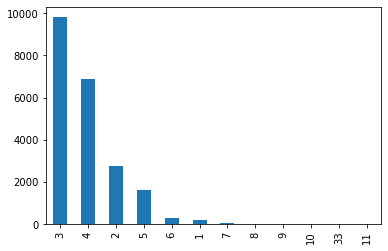

In [13]:
#seeing how many bedrooms most houses have since my mean code isn't working
house['bedrooms'].value_counts().plot(kind='bar')
plt.title = ('# of Bedrooms')
plt.xlabel= ('Bedrooms')
plt.ylabel= ('Count')

C:\Users\kamry\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 936x936 with 0 Axes>

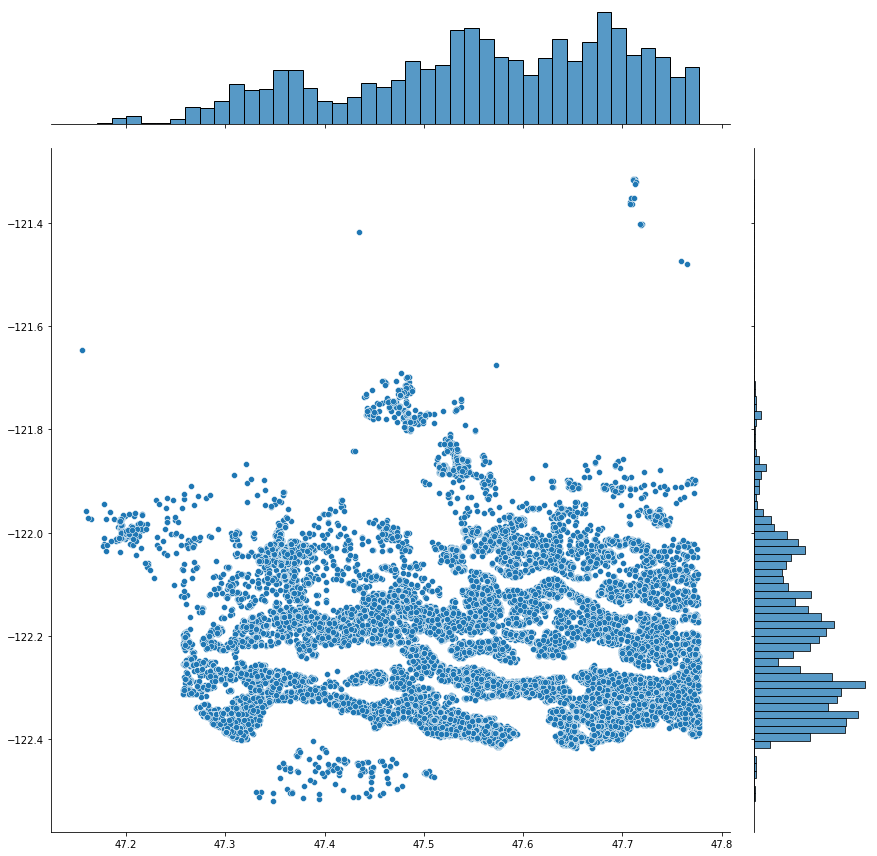

In [14]:
#shows us where the most houses are located in the dataset
plt.figure(figsize=(13,13))
sns.jointplot(x=house.lat.values, y= house.long.values, size= 12)
plt.xlabel= ('Longitude')
plt.ylabel= ('Latitude')
plt.show()

TypeError: 'str' object is not callable

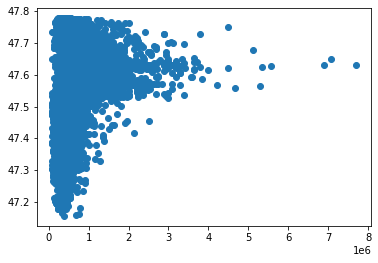

In [16]:
plt.scatter(house.price, house.lat)
plt.title('Location and Price')

TypeError: 'str' object is not callable

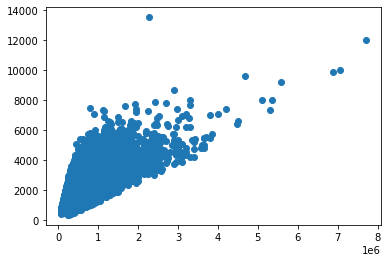

In [17]:
plt.scatter(house.price, house.sqft_living)
plt.title('Square Feet')

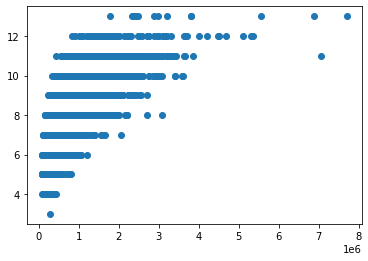

In [19]:
plt.scatter(house.price, house.grade)

In [ ]:
#bin zipcodes into towns (reduced dimensions)
#encode (one-hind code)
#create booleans for basement